# Sign language detection 

![Image Description](sn1.png)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'numpy'

In [ ]:
#load our libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
train = pd.read_csv(r'C:\Users\Adithi\Downloads\sign_mnist_train\sign_mnist_train.csv')
test = pd.read_csv(r'C:\Users\Adithi\Downloads\sign_mnist_test\sign_mnist_test.csv')

In [ ]:
#inspecting our training data
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [ ]:
# get our training data
labels = train['label'].values


In [ ]:
#view the unique labels , 24 in total(no 9)
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

<Axes: ylabel='count'>

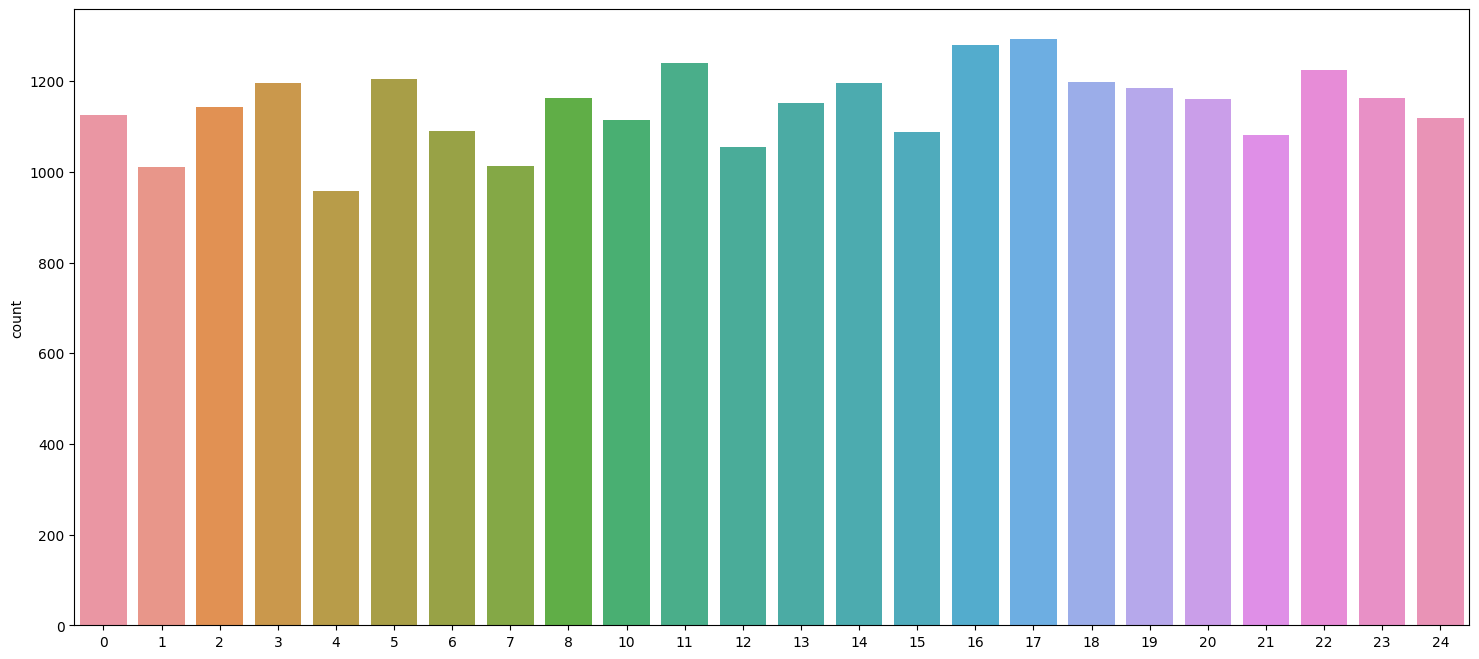

In [ ]:
#plot the quantities in each class
plt.figure(figsize = (18,8))
sns.countplot(x=labels)

In [ ]:
#drop training labels from our training data so we can seperate it 
train.drop('label',axis =1, inplace = True)

In [ ]:
#extract the image from each row in our csv , remembr its in a row of 784 columns
images = train.values
images = np.array([np.reshape(i,(28,28)) for i in images])
images = np.array([i.flatten() for i in images])

In [ ]:
#hot one encode our labels
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [ ]:
#view our labels
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [ ]:
#len(labels)
len(labels[0])

24

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


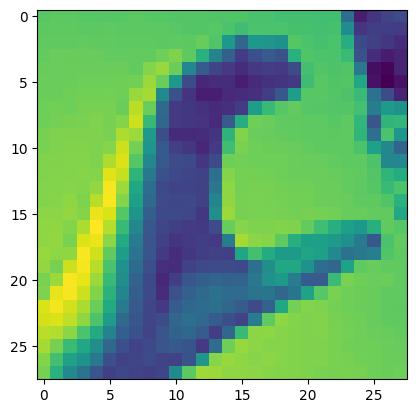

In [ ]:
#inspect on image
index =2
print(labels[index])
plt.imshow(images[index].reshape(28,28))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


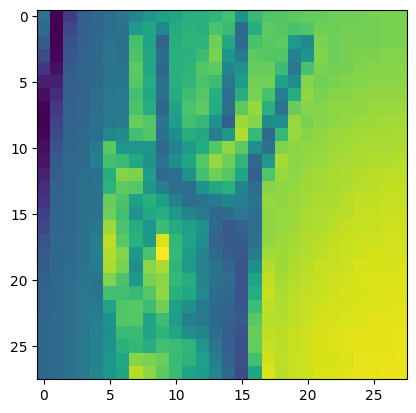

In [ ]:
#inspect on image
index =7
print(labels[index])
plt.imshow(images[index].reshape(28,28))

In [ ]:
#use openCV to view 10 random images from our training data
import cv2
import numpy as np

for i in range(0,10):
    rand = np.random.randint(0,len(images))
    import_im = images[rand]
    
    sample = import_im.reshape(28,28).astype(np.uint8)
    sample = cv2.resize(sample,None,fx =10, fy=10, interpolation = cv2.INTER_CUBIC)
    cv2.imshow("sample image",sample)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()
    

In [ ]:

pip install opencv-python


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: C:\Users\Adithi\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [ ]:
#use openCV to view 10 random images from our training data
import cv2
import numpy as np

for i in range(0,10):
    rand = np.random.randint(0,len(images))
    import_im = images[rand]
    
    sample = import_im.reshape(28,28).astype(np.uint8)
    sample = cv2.resize(sample,None,fx =10, fy=10, interpolation = cv2.INTER_CUBIC)
    cv2.imshow("sample image",sample)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

In [ ]:
# split our data into x_train , x_test , y_train, y_test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train,y_test = train_test_split(images,labels,test_size =0.3, random_state =101)

In [ ]:
#start loading our tensorflow modules and define our batch size etc
from keras.models import Sequential
from keras.layers import Dense , Conv2D , MaxPooling2D, Flatten , Dropout

batch_size =128
num_classes = 24
epochs =10

In [ ]:
#scale our images
x_train = x_train/255
x_test = x_test /255

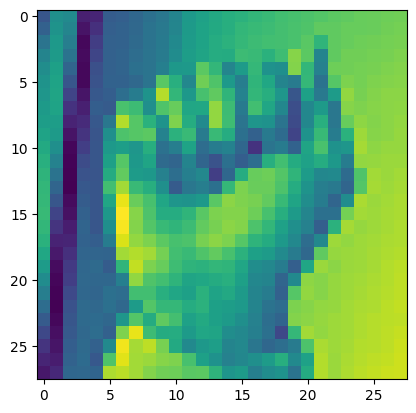

In [ ]:
#reshape them into the size requires by TF and keras
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

plt.imshow(x_train[0].reshape(28,28))

In [ ]:
#create our CNN Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import Adam 

model = Sequential()
model.add(Conv2D(64,kernel_size =(3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,kernel_size =(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,kernel_size =(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))


In [ ]:
#copile your model
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'])


In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 64)          0

In [ ]:
#training our model
history = model.fit(x_train , y_train , validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10
151/151 [==============================] - 11s 57ms/step - loss: 2.7998 - accuracy: 0.1450 - val_loss: 1.9508 - val_accuracy: 0.3873
Epoch 2/10
151/151 [==============================] - 8s 54ms/step - loss: 1.4525 - accuracy: 0.5061 - val_loss: 0.9534 - val_accuracy: 0.6969
Epoch 3/10
151/151 [==============================] - 8s 54ms/step - loss: 0.8692 - accuracy: 0.6997 - val_loss: 0.6655 - val_accuracy: 0.7810
Epoch 4/10
151/151 [==============================] - 8s 54ms/step - loss: 0.6149 - accuracy: 0.7877 - val_loss: 0.4602 - val_accuracy: 0.8422
Epoch 5/10
151/151 [==============================] - 8s 54ms/step - loss: 0.4343 - accuracy: 0.8511 - val_loss: 0.2848 - val_accuracy: 0.9120
Epoch 6/10
151/151 [==============================] - 8s 55ms/step - loss: 0.3318 - accuracy: 0.8896 - val_loss: 0.1936 - val_accuracy: 0.9426
Epoch 7/10
151/151 [==============================] - 8s 53ms/step - loss: 0.2412 - accuracy: 0.9217 - val_loss: 0.1315 - val_accuracy: 0.963

In [ ]:
#save our model
model.save('sign_mnist_cnn_50_Epochs.h5')

C:\Users\Adithi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Replace model.save() with saving in the native Keras format
model.save('my_model.keras')


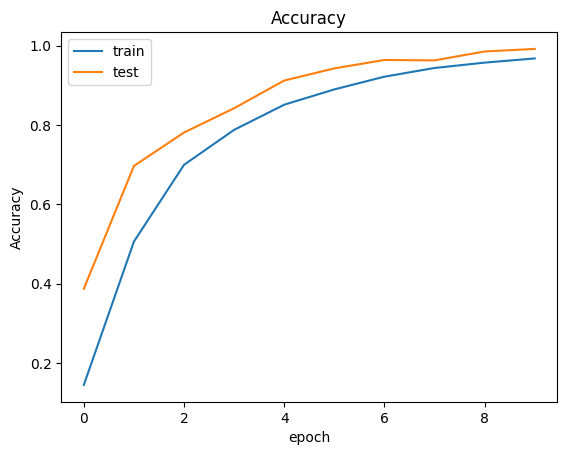

In [ ]:
#view our training history graphically 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])

#plt.show()

In [ ]:
#reshape our test data so that we can evaluate it's performance on unseen data

test_labels = test['label']
test.drop('label', axis =1, inplace = True)

test_images = test.values
test_images = np.array([np.reshape(i,(28,28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

test_labels = label_binrizer.fit_transform(test_labels)
test_images = test_images.reshape(test_images.shape[0],28,28,1)
test_images.shape

y_pred = model.predict(test_images)

225/225 [==============================] - 2s 9ms/step


In [ ]:
#get your accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, y_pred.round())

0.7822085889570553

In [ ]:
test.columns


Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=784)

In [ ]:
train.columns

Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=784)

In [ ]:
#create function to math label to letter 
def getLetter(result):
    classLabels = {0:'B',
                   1:'D',
                   2:'P',
                   3:'X',
                   4:'E',
                   5:'F',
                   6:'O',
                   7:'S',
                   8:'E',
                   9:'K',
                   10:'L',
                   11:'M',
                   12:'N',
                   13:'O',
                   14:'P',
                   15:'Q',
                   16:'R',
                   17:'S',
                   18:'T',
                   19:'U',
                   20:'V',
                   21:'W',
                   22:'X',
                   23:'Y'}
    try:
        res = int(result)
        return classLabels[res]
    except:
        return "Error"
                  
                  
                  
                  
                  
                  
                  
                  
                  
                  
                 

## test on webcam input 

In [ ]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    
    roi = frame[100:400, 320:620]
    cv2.imshow('roi', roi)
    
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
    cv2.imshow('roi scaled and gray', roi)
    
    copy = frame.copy()
    cv2.rectangle(copy, (320, 100), (620, 400), (255, 0, 0), 5)
    
    roi = roi.reshape(1, 28, 28, 1)
    
    # Assuming model.predict returns probabilities for each class
    predicted_probabilities = model.predict(roi)
    predicted_class = np.argmax(predicted_probabilities)
    
    result = str(predicted_class)
    cv2.putText(copy, getLetter(result), (300, 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
    cv2.imshow('frame', copy)
    
    if cv2.waitKey(1) == 13:  # 13 is the enter key
        break
        
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 61ms/step


1/1 [==============================] - 0s 61ms/step


1/1 [==============================] - 0s 59ms/step


1/1 [==============================] - 0s 56ms/step


1/1 [==============================] - 0s 60ms/step


1/1 [==============================] - 0s 58ms/step


1/1 [==============================] - 0s 57ms/step


1/1 [==============================] - 0s 59ms/step


1/1 [==============================] - 0s 57ms/step


1/1 [==============================] - 0s 56ms/step


1/1 [==============================] - 0s 60ms/step


1/1 [==============================] - 0s 58ms/step


1/1 [==============================] - 0s 73ms/step


1/1 [==============================] - 0s 60ms/step


1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 57ms/step


1/1 [==============================] - 0s 62ms/step


KeyboardInterrupt: 